In [2]:
%config ZMQInteractiveShell.ast_node_interactivity='all'
from hiive import mdptoolbox
from hiive.mdptoolbox.mdp import PolicyIteration, ValueIteration, QLearning
import gym
import time
import pickle
import os, sys

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Generate Problem

In [6]:
arr_trans, arr_reward = mdptoolbox.example.forest(S=300, r1=100, r2=50, p=0.1)

### Value iteration

In [ ]:
val_iter_perf_dict = {}
gamma_list = [0.3, 0.5, 0.7, 0.9, 0.99]
epsilon_list = [0.001, 0.0001, 0.00001]
best_score = 0
for gamma in gamma_list:
    for epsilon in epsilon_list:
        experiment_id = f'gamma={gamma}_epsilon={epsilon}'
        value_iteration_mdp = mdptoolbox.mdp.ValueIteration(transitions, reward_arr, gamma = gamma, epsilon = epsilon)
        value_iteration_mdp.run()
        state_val_arr = np.asarray(value_iteration_mdp.V)
        policy_arr = np.asarray(value_iteration_mdp.policy)
        iterations_taken = value_iteration_mdp.iter
        time_taken = value_iteration_mdp.time
        max_v = value_iteration_mdp.run_stats[-1]['Max V']
        summary = experiment_id + f', Value iteration took {iterations_taken} iterations and {round(time_taken, 5)} seconds, achieved {round(max_v, 2)} max value'
        print(summary)
        
        experiment_dict = {}
        experiment_dict['state_val_arr'] = state_val_arr
        experiment_dict['policy_arr'] = policy_arr
        experiment_dict['iterations_taken'] = iterations_taken
        experiment_dict['time_taken'] = time_taken
        experiment_dict['score'] = max_v
        experiment_dict['p_cumulative'] = value_iteration_mdp.p_cumulative
        experiment_dict['error_mean'] = value_iteration_mdp.error_mean
        experiment_dict['run_stats'] = value_iteration_mdp.run_stats
        val_iter_perf_dict[experiment_id] = experiment_dict
        
        with open('forest_val_iter_output.txt', 'a') as f:
            f.write(summary)

        with open('forest_val_iter_dict.pickle', 'wb') as handle:
            pickle.dump(val_iter_perf_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
        if max_v > best_score:
            best_score = max_v
            best_params = experiment_id
        
print(f'best params are {best_params}')

In [9]:
def run_vi(transitions, reward_arr, gamma_list, epsilon_list):
    
    val_iter_perf_dict = {}
    best_score = 0
    for gamma in gamma_list:
        for epsilon in epsilon_list:
            experiment_id = f'gamma={gamma}_epsilon={epsilon}'
            value_iteration_mdp = mdptoolbox.mdp.ValueIteration(transitions, reward_arr, gamma = gamma, epsilon = epsilon)
            value_iteration_mdp.run()
            state_val_arr = np.asarray(value_iteration_mdp.V)
            policy_arr = np.asarray(value_iteration_mdp.policy)
            iterations_taken = value_iteration_mdp.iter
            time_taken = value_iteration_mdp.time
            max_v = value_iteration_mdp.run_stats[-1]['Max V']
            summary = experiment_id + f', Value iteration took {iterations_taken} iterations and {round(time_taken, 5)} seconds, achieved {round(max_v, 2)} max value'
            print(summary)

            experiment_dict = {}
            experiment_dict['state_val_arr'] = state_val_arr
            experiment_dict['policy_arr'] = policy_arr
            experiment_dict['iterations_taken'] = iterations_taken
            experiment_dict['time_taken'] = time_taken
            experiment_dict['score'] = max_v
            experiment_dict['p_cumulative'] = value_iteration_mdp.p_cumulative
            experiment_dict['error_mean'] = value_iteration_mdp.error_mean
            experiment_dict['run_stats'] = value_iteration_mdp.run_stats
            val_iter_perf_dict[experiment_id] = experiment_dict

            if max_v > best_score:
                best_score = max_v
                best_params = experiment_id
    
    return val_iter_perf_dict, best_params

#### running

In [10]:
vi_lst_gamma=[0.5, 0.75, 0.9, 0.95, 0.99]
vi_lst_eps=[1e-3, 1e-6, 1e-9, 1e-12, 1e-15]
    
res_vi_dict, res_vi_best_id = run_vi(arr_trans, arr_reward, vi_lst_gamma, vi_lst_eps)

gamma=0.5_epsilon=0.001, Value iteration took 15 iterations and 0.00283 seconds, achieved 181.87 max value
gamma=0.5_epsilon=1e-06, Value iteration took 24 iterations and 0.00436 seconds, achieved 181.87 max value
gamma=0.5_epsilon=1e-09, Value iteration took 32 iterations and 0.00539 seconds, achieved 181.87 max value
gamma=0.5_epsilon=1e-12, Value iteration took 41 iterations and 0.00645 seconds, achieved 181.87 max value
gamma=0.5_epsilon=1e-15, Value iteration took 50 iterations and 0.00502 seconds, achieved 181.87 max value
gamma=0.75_epsilon=0.001, Value iteration took 33 iterations and 0.00348 seconds, achieved 308.06 max value
gamma=0.75_epsilon=1e-06, Value iteration took 50 iterations and 0.00607 seconds, achieved 308.06 max value
gamma=0.75_epsilon=1e-09, Value iteration took 68 iterations and 0.00638 seconds, achieved 308.06 max value
gamma=0.75_epsilon=1e-12, Value iteration took 85 iterations and 0.00822 seconds, achieved 308.06 max value
gamma=0.75_epsilon=1e-15, Value i

#### performance

In [12]:
def plot_performance_eps(res_vi_dict, epsilon_list, best_gamma):
    graphs = ['iterations_taken', 'time_taken', 'score']
    variables_dict = {graph:[] for graph in graphs}
    
    for gamma in [best_gamma]:
        for epsilon in epsilon_list:
            experiment_id = f'gamma={gamma}_epsilon={epsilon}'
            for graph in graphs:
                variables_dict[graph].append(res_vi_dict[experiment_id][graph])

    fig, axes = plt.subplots(1,3, figsize=(15,5))
    for ax, graph in zip(axes.ravel(), graphs):
        ax.plot(epsilon_list, variables_dict[graph], label=graph, lw=2)
        ax.title.set_text(f'{graph} vs epsilon')
        ax.set_xlabel('epsilon')
        ax.set_ylabel(graph)
        ax.grid()

    fig.tight_layout()
    plt.suptitle('Varying epsilons for value iterations')
    plt.subplots_adjust(top=0.9)
    plt.show();

In [13]:
res_vi_best_id

'gamma=0.99_epsilon=1e-15'

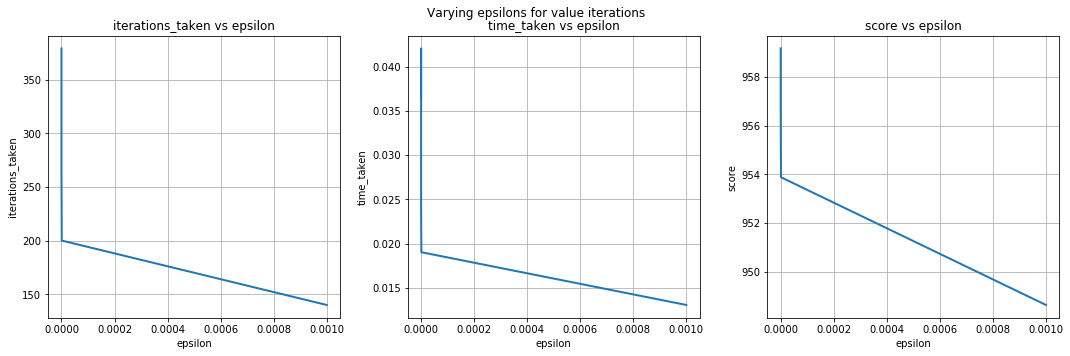

In [14]:
plot_performance_eps(res_vi_dict, vi_lst_eps, 0.99)

In [16]:
def plot_performance_gamma(res_vi_dict, gamma_list, best_eps):    
    graphs = ['iterations_taken', 'time_taken', 'score']
    variables_dict = {graph:[] for graph in graphs}
    for gamma in gamma_list:
        for epsilon in [best_eps]:
            experiment_id = f'gamma={gamma}_epsilon={epsilon}'
            for graph in graphs:
                variables_dict[graph].append(res_vi_dict[experiment_id][graph])

    fig, axes = plt.subplots(1,3, figsize=(15,5))
    for ax, graph in zip(axes.ravel(), graphs):
        ax.plot(gamma_list, variables_dict[graph], label=graph)
        ax.title.set_text(f'{graph} vs gamma')
        ax.set_xlabel('gamma')
        ax.set_ylabel(graph)
        ax.grid()

    fig.tight_layout()
    plt.suptitle('Varying gamma for value iterations')
    plt.subplots_adjust(top=0.9)
    plt.show();

In [17]:
res_vi_best_id

'gamma=0.99_epsilon=1e-15'

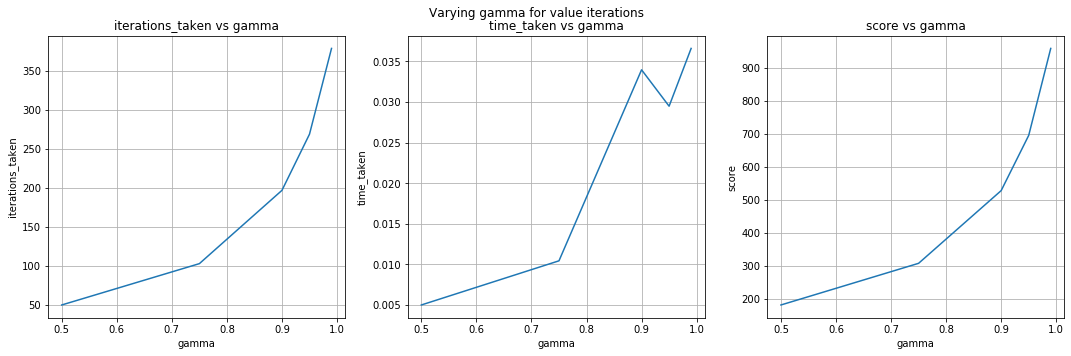

In [18]:
plot_performance_gamma(res_vi_dict, vi_lst_gamma, 1e-15);

In [24]:
def plot_performance_best(val_iter_perf_dict, best_params):
    stats_list = val_iter_perf_dict[best_params]['run_stats']
    graphs = ['Error', 'Max V', 'Mean V', 'Reward', 'Time']
    fig, axes = plt.subplots(1,5, figsize=(20,5))
    for ax, graph in zip(axes.ravel(), graphs):
        iterations_list = [stats['Iteration'] for stats in stats_list]
        variable_list = [stats[graph] for stats in stats_list]
        ax.plot(iterations_list, variable_list, label=graph, lw=3)
        ax.title.set_text(f'{graph} vs iteration')
        ax.set_xlabel('iteration')
        ax.set_ylabel(graph)
        ax.grid()

    fig.tight_layout()
    plt.suptitle('Graphs of tracked variables against iterations')
    plt.subplots_adjust(top=0.9)
    plt.show();

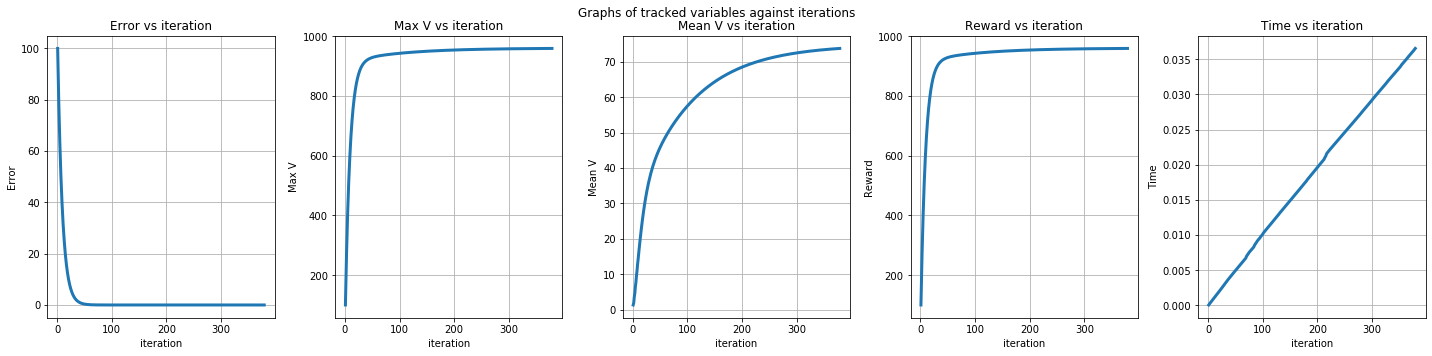

In [26]:
plot_performance_best(res_vi_dict, res_vi_best_id);

### Policy iteration

#### running

In [19]:
def run_pi(transitions, reward_arr, gamma_list):
    policy_iter_perf_dict = {}
    best_score = 0
    for gamma in gamma_list:
        experiment_id = f'gamma={gamma}'

        policy_iteration_mdp = mdptoolbox.mdp.PolicyIteration(transitions, reward_arr, gamma = gamma)
        policy_iteration_mdp.run()
        state_val_arr = np.asarray(policy_iteration_mdp.V)
        policy_arr = np.asarray(policy_iteration_mdp.policy)
        iterations_taken = policy_iteration_mdp.iter
        time_taken = policy_iteration_mdp.time
        max_v = policy_iteration_mdp.run_stats[-1]['Max V']
        summary = experiment_id + f', Policy iteration took {iterations_taken} iterations and {round(time_taken, 5)} seconds, achieved {round(max_v, 2)} max value'
        print(summary)

        experiment_dict = {}
        experiment_dict['state_val_arr'] = state_val_arr
        experiment_dict['policy_arr'] = policy_arr
        experiment_dict['iterations_taken'] = iterations_taken
        experiment_dict['time_taken'] = time_taken
        experiment_dict['score'] = max_v
        experiment_dict['p_cumulative'] = policy_iteration_mdp.p_cumulative
        experiment_dict['error_mean'] = policy_iteration_mdp.error_mean
        experiment_dict['run_stats'] = policy_iteration_mdp.run_stats
        policy_iter_perf_dict[experiment_id] = experiment_dict

        if max_v > best_score:
            best_score = max_v
            best_params = experiment_id

    return policy_iter_perf_dict, best_params    

In [20]:
pi_lst_gamma=[0.5, 0.75, 0.9, 0.95, 0.99]
res_pi_dict, res_pi_best_id = run_pi(arr_trans, arr_reward, pi_lst_gamma)

gamma=0.5, Policy iteration took 7 iterations and 0.01877 seconds, achieved 181.87 max value
gamma=0.75, Policy iteration took 14 iterations and 0.03038 seconds, achieved 308.06 max value
gamma=0.9, Policy iteration took 25 iterations and 0.04003 seconds, achieved 528.44 max value
gamma=0.95, Policy iteration took 34 iterations and 0.04544 seconds, achieved 695.69 max value
gamma=0.99, Policy iteration took 46 iterations and 0.06762 seconds, achieved 960.23 max value


#### performance

In [21]:
def plot_performance_gamma_pi(res_pi_dict, gamma_list):    
    graphs = ['iterations_taken', 'time_taken', 'score']
    variables_dict = {graph:[] for graph in graphs}
    for gamma in gamma_list:
        experiment_id = f'gamma={gamma}'
        for graph in graphs:
            variables_dict[graph].append(res_pi_dict[experiment_id][graph])

    fig, axes = plt.subplots(1,3, figsize=(15,5))
    for ax, graph in zip(axes.ravel(), graphs):
        ax.plot(gamma_list, variables_dict[graph], label=graph)
        ax.title.set_text(f'{graph} vs gamma')
        ax.set_xlabel('gamma')
        ax.set_ylabel(graph)
        ax.grid()

    fig.tight_layout()
    plt.suptitle('Varying gamma for policy iterations')
    plt.subplots_adjust(top=0.9)
    plt.show();

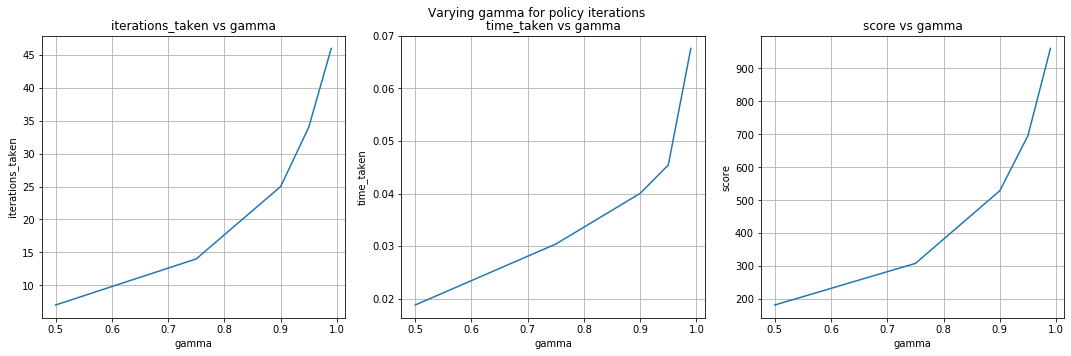

In [22]:
plot_performance_gamma_pi(res_pi_dict, pi_lst_gamma)

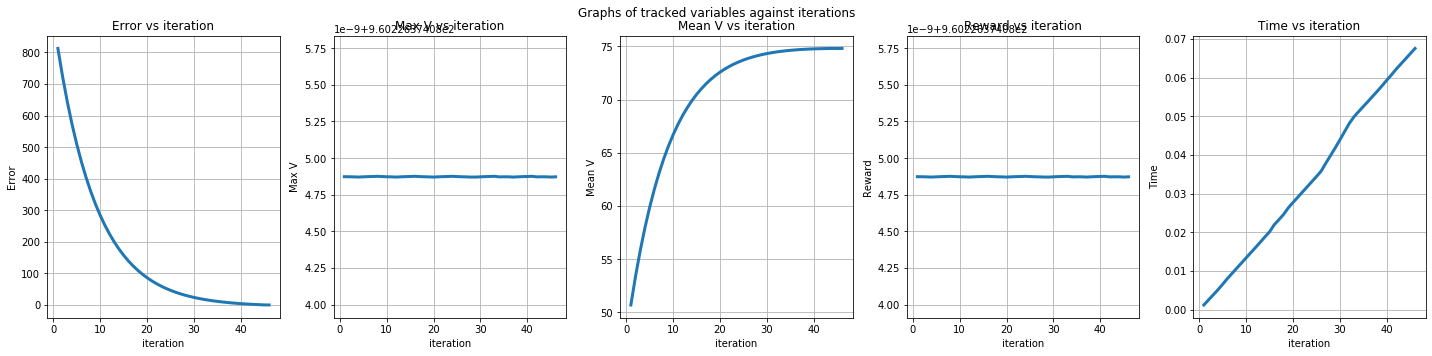

In [27]:
plot_performance_best(res_pi_dict, res_pi_best_id);

### Q-learning

In [28]:
qlearning_perf_dict = {}
best_score = 0
gamma_list = [0.99, 0.7, 0.5]
n_iter_list = [100000, 1000000, 10000000]
alpha_decay_list = [0.9, 0.99, 0.999]
epsilon_decay_list = [0.9, 0.99, 0.999]
for gamma in gamma_list:
    for n_iter in n_iter_list:
        for alpha_decay in alpha_decay_list:
            for epsilon_decay in epsilon_decay_list:
                experiment_id = f'gamma={gamma}_n_iter={n_iter}_alpha_decay={alpha_decay}_epsilon_decay={epsilon_decay}'
                qlearning_mdp = mdptoolbox.mdp.QLearning(transitions, reward_arr, gamma = gamma, n_iter = n_iter,
                                                         alpha_decay = alpha_decay, epsilon_decay = epsilon_decay)
                qlearning_mdp.run()
                state_val_arr = np.asarray(qlearning_mdp.V)
                policy_arr = np.asarray(qlearning_mdp.policy)
                time_taken = qlearning_mdp.time
                max_v = qlearning_mdp.run_stats[-1]['Max V']
                summary = experiment_id + f', Qlearning took {n_iter} iterations and {round(time_taken, 5)} seconds, achieved {round(max_v, 2)} max value'
                print(summary)
                experiment_dict = {}
                experiment_dict['state_val_arr'] = state_val_arr
                experiment_dict['policy_arr'] = policy_arr
                experiment_dict['iterations_taken'] = n_iter
                experiment_dict['time_taken'] = time_taken
                experiment_dict['score'] = max_v
                experiment_dict['p_cumulative'] = qlearning_mdp.p_cumulative
                experiment_dict['error_mean'] = qlearning_mdp.error_mean
                experiment_dict['run_stats'] = qlearning_mdp.run_stats
                qlearning_perf_dict[experiment_id] = experiment_dict
                
                with open('forest_qlearning_output.txt', 'a') as f:
                    f.write(summary)

                with open('forest_qlearning_dict.pickle', 'wb') as handle:
                    pickle.dump(qlearning_perf_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

                if max_v > best_score:
                    best_score = max_v
                    best_params = experiment_id

print(f'best params are {best_params}')

[{'State': 8,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0009007453918457031,
  'Alpha': 0.03874204890000002,
  'Epsilon': 0.38742048900000015,
  'Gamma': 0.99,
  'Max V': 0.1,
  'Mean V': 0.0003333333333333334,
  'Iteration': 10},
 {'State': 0,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0007255879301000006,
  'Time': 0.001561880111694336,
  'Alpha': 0.013508517176729932,
  'Epsilon': 0.13508517176729928,
  'Gamma': 0.99,
  'Max V': 0.1,
  'Mean V': 0.0006404381831448689,
  'Iteration': 20},
 {'State': 0,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.00029991640095607103,
  'Time': 0.002262115478515625,
  'Alpha': 0.00471012869724625,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 0.1,
  'Mean V': 0.0006821852978630075,
  'Iteration': 30},
 {'State': 0,
  'Action': 0,
  'Reward': 0.0,
  'Error': 6.02988546379675e-08,
  'Time': 0.002724885940551758,
  'Alpha': 0.0016423203268260682,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 0.1,
  'Mean V': 0.0007299681282910195,
  

138

gamma=0.99_n_iter=100000_alpha_decay=0.9_epsilon_decay=0.9, Qlearning took 100000 iterations and 3.84843 seconds, achieved 17.46 max value


[{'State': 0,
  'Action': 1,
  'Reward': 0.0,
  'Error': 0.00015641693966106436,
  'Time': 0.0007290840148925781,
  'Alpha': 0.03874204890000002,
  'Epsilon': 0.9135172474836407,
  'Gamma': 0.99,
  'Max V': 0.09000000000000001,
  'Mean V': 0.0007173103642585534,
  'Iteration': 10},
 {'State': 2,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.012984530972182206,
  'Time': 0.0015032291412353516,
  'Alpha': 0.013508517176729932,
  'Epsilon': 0.8261686238355865,
  'Gamma': 0.99,
  'Max V': 0.09022572267139836,
  'Mean V': 0.0008358136109591778,
  'Iteration': 20},
 {'State': 0,
  'Action': 1,
  'Reward': 0.0,
  'Error': 5.0919592629096606e-05,
  'Time': 0.002067089080810547,
  'Alpha': 0.00471012869724625,
  'Epsilon': 0.7471720943315961,
  'Gamma': 0.99,
  'Max V': 0.10029204188950917,
  'Mean V': 0.0008934571952310766,
  'Iteration': 30},
 {'State': 2,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.0015499701394748352,
  'Time': 0.0026772022247314453,
  'Alpha': 0.0016423203268260682,
  'Eps

gamma=0.99_n_iter=100000_alpha_decay=0.9_epsilon_decay=0.99, Qlearning took 100000 iterations and 3.79505 seconds, achieved 17.45 max value


139

[{'State': 0,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.001651040988266992,
  'Time': 0.0007619857788085938,
  'Alpha': 0.03874204890000002,
  'Epsilon': 0.9910359161258742,
  'Gamma': 0.99,
  'Max V': 0.08100000000000002,
  'Mean V': 0.0005961395399608901,
  'Iteration': 10},
 {'State': 0,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0009490282773150044,
  'Time': 0.0012972354888916016,
  'Alpha': 0.013508517176729932,
  'Epsilon': 0.9811700348643991,
  'Gamma': 0.99,
  'Max V': 0.08100000000000002,
  'Mean V': 0.0008042147411322409,
  'Iteration': 20},
 {'State': 0,
  'Action': 1,
  'Reward': 0.0,
  'Error': 3.1808278177952344e-05,
  'Time': 0.001833200454711914,
  'Alpha': 0.00471012869724625,
  'Epsilon': 0.9714023696327185,
  'Gamma': 0.99,
  'Max V': 0.09481203714788625,
  'Mean V': 0.0008648234032861044,
  'Iteration': 30},
 {'State': 1,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.0015234615928612985,
  'Time': 0.0023469924926757812,
  'Alpha': 0.0016423203268260682,
  'Epsi

gamma=0.99_n_iter=100000_alpha_decay=0.9_epsilon_decay=0.999, Qlearning took 100000 iterations and 3.97151 seconds, achieved 17.43 max value


140

[{'State': 0,
  'Action': 1,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0005831718444824219,
  'Alpha': 0.09135172474836409,
  'Epsilon': 0.38742048900000015,
  'Gamma': 0.99,
  'Max V': 0.1,
  'Mean V': 0.0003333333333333334,
  'Iteration': 10},
 {'State': 1,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.001055002212524414,
  'Alpha': 0.08261686238355864,
  'Epsilon': 0.13508517176729928,
  'Gamma': 0.99,
  'Max V': 0.1,
  'Mean V': 0.0003333333333333334,
  'Iteration': 20},
 {'State': 8,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0014960765838623047,
  'Alpha': 0.0747172094331596,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 0.1,
  'Mean V': 0.0003333333333333334,
  'Iteration': 30},
 {'State': 6,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.0675729049060283,
  'Time': 0.001961231231689453,
  'Alpha': 0.0675729049060283,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 0.1,
  'Mean V': 0.0008002364616727121,
  'Iteration': 40},
 {'State': 4,
  'Action':

gamma=0.99_n_iter=100000_alpha_decay=0.99_epsilon_decay=0.9, Qlearning took 100000 iterations and 4.15667 seconds, achieved 17.66 max value


139

[{'State': 0,
  'Action': 1,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0007679462432861328,
  'Alpha': 0.09135172474836409,
  'Epsilon': 0.9135172474836407,
  'Gamma': 0.99,
  'Max V': 0.1821392969679556,
  'Mean V': 0.0006375815648093068,
  'Iteration': 10},
 {'State': 0,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.001897950595646845,
  'Time': 0.0014750957489013672,
  'Alpha': 0.08261686238355864,
  'Epsilon': 0.8261686238355865,
  'Gamma': 0.99,
  'Max V': 0.1821392969679556,
  'Mean V': 0.000980167122434538,
  'Iteration': 20},
 {'State': 0,
  'Action': 1,
  'Reward': 0.0,
  'Error': 0.0015412048480396142,
  'Time': 0.0021429061889648438,
  'Alpha': 0.0747172094331596,
  'Epsilon': 0.7471720943315961,
  'Gamma': 0.99,
  'Max V': 0.24857952139886014,
  'Mean V': 0.0019114726490045864,
  'Iteration': 30},
 {'State': 0,
  'Action': 1,
  'Reward': 0.0,
  'Error': 0.004023639500703565,
  'Time': 0.0028390884399414062,
  'Alpha': 0.0675729049060283,
  'Epsilon': 0.6757290490602831,
 

gamma=0.99_n_iter=100000_alpha_decay=0.99_epsilon_decay=0.99, Qlearning took 100000 iterations and 4.03104 seconds, achieved 18.13 max value


140

[{'State': 1,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.00074005126953125,
  'Alpha': 0.09135172474836409,
  'Epsilon': 0.9910359161258742,
  'Gamma': 0.99,
  'Max V': 0.18466587253392908,
  'Mean V': 0.0006999867120549789,
  'Iteration': 10},
 {'State': 0,
  'Action': 1,
  'Reward': 0.0,
  'Error': 0.0028848191396084605,
  'Time': 0.0014178752899169922,
  'Alpha': 0.08261686238355864,
  'Epsilon': 0.9811700348643991,
  'Gamma': 0.99,
  'Max V': 0.18466587253392908,
  'Mean V': 0.0013373783041795287,
  'Iteration': 20},
 {'State': 3,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.011755014255158455,
  'Time': 0.0021088123321533203,
  'Alpha': 0.0747172094331596,
  'Epsilon': 0.9714023696327185,
  'Gamma': 0.99,
  'Max V': 0.18466587253392908,
  'Mean V': 0.0014650057288275074,
  'Iteration': 30},
 {'State': 0,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.007657223801219467,
  'Time': 0.002785921096801758,
  'Alpha': 0.0675729049060283,
  'Epsilon': 0.9617319426784903,
 

gamma=0.99_n_iter=100000_alpha_decay=0.99_epsilon_decay=0.999, Qlearning took 100000 iterations and 4.11089 seconds, achieved 17.77 max value


141

[{'State': 0,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0009606831064194269,
  'Time': 0.0006930828094482422,
  'Alpha': 0.09910359161258742,
  'Epsilon': 0.38742048900000015,
  'Gamma': 0.99,
  'Max V': 0.1889227362021523,
  'Mean V': 0.0009989168739277805,
  'Iteration': 10},
 {'State': 0,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.008817921175316528,
  'Time': 0.0012819766998291016,
  'Alpha': 0.09811700348643991,
  'Epsilon': 0.13508517176729928,
  'Gamma': 0.99,
  'Max V': 0.34156951819962983,
  'Mean V': 0.001858467919739732,
  'Iteration': 20},
 {'State': 2,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.05552152109585181,
  'Time': 0.001852273941040039,
  'Alpha': 0.09714023696327186,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 0.5234413642558458,
  'Mean V': 0.002671764344108007,
  'Iteration': 30},
 {'State': 1,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.038655482429439836,
  'Time': 0.0023992061614990234,
  'Alpha': 0.09617319426784902,
  'Epsilon': 0.1,
  'Gamma': 0.

gamma=0.99_n_iter=100000_alpha_decay=0.999_epsilon_decay=0.9, Qlearning took 100000 iterations and 3.98309 seconds, achieved 12.95 max value


140

[{'State': 1,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.09910359161258742,
  'Time': 0.00080108642578125,
  'Alpha': 0.09910359161258742,
  'Epsilon': 0.9135172474836407,
  'Gamma': 0.99,
  'Max V': 0.1,
  'Mean V': 0.0006636786387086247,
  'Iteration': 10},
 {'State': 1,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.07767514356954151,
  'Time': 0.0015120506286621094,
  'Alpha': 0.09811700348643991,
  'Epsilon': 0.8261686238355865,
  'Gamma': 0.99,
  'Max V': 0.3506497352113781,
  'Mean V': 0.0020570026347858103,
  'Iteration': 20},
 {'State': 0,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.02859836497120759,
  'Time': 0.0021910667419433594,
  'Alpha': 0.09714023696327186,
  'Epsilon': 0.7471720943315961,
  'Gamma': 0.99,
  'Max V': 0.42309137552576737,
  'Mean V': 0.002922313134055873,
  'Iteration': 30},
 {'State': 2,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.10048940998860771,
  'Time': 0.002894163131713867,
  'Alpha': 0.09617319426784902,
  'Epsilon': 0.6757290490602831,
  'Ga

gamma=0.99_n_iter=100000_alpha_decay=0.999_epsilon_decay=0.99, Qlearning took 100000 iterations and 3.99347 seconds, achieved 31.6 max value


140

[{'State': 0,
  'Action': 1,
  'Reward': 0.0,
  'Error': 0.0007817895682554061,
  'Time': 0.0007870197296142578,
  'Alpha': 0.09910359161258742,
  'Epsilon': 0.9910359161258742,
  'Gamma': 0.99,
  'Max V': 0.19015790617356337,
  'Mean V': 0.0009995966093995193,
  'Iteration': 10},
 {'State': 4,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0014982223510742188,
  'Alpha': 0.09811700348643991,
  'Epsilon': 0.9811700348643991,
  'Gamma': 0.99,
  'Max V': 0.19015790617356337,
  'Mean V': 0.001481745774171043,
  'Iteration': 20},
 {'State': 0,
  'Action': 1,
  'Reward': 0.0,
  'Error': 0.004233138268888982,
  'Time': 0.0022153854370117188,
  'Alpha': 0.09714023696327186,
  'Epsilon': 0.9714023696327185,
  'Gamma': 0.99,
  'Max V': 0.19015790617356337,
  'Mean V': 0.0021821621141946282,
  'Iteration': 30},
 {'State': 0,
  'Action': 1,
  'Reward': 0.0,
  'Error': 0.004487296312027435,
  'Time': 0.002897977828979492,
  'Alpha': 0.09617319426784902,
  'Epsilon': 0.9617319426784903

gamma=0.99_n_iter=100000_alpha_decay=0.999_epsilon_decay=0.999, Qlearning took 100000 iterations and 3.78158 seconds, achieved 25.31 max value


142

[{'State': 116,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.005578041076660156,
  'Alpha': 0.001,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 0.1,
  'Mean V': 0.0006674611323497875,
  'Iteration': 100},
 {'State': 201,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.010903120040893555,
  'Alpha': 0.001,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 0.1,
  'Mean V': 0.0007510199911194834,
  'Iteration': 200},
 {'State': 219,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.017095327377319336,
  'Alpha': 0.001,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 0.1,
  'Mean V': 0.0008276324291790925,
  'Iteration': 300},
 {'State': 105,
  'Action': 0,
  'Reward': 0.0,
  'Error': 2.307993629679611e-07,
  'Time': 0.02236318588256836,
  'Alpha': 0.001,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 0.10006758885831636,
  'Mean V': 0.0009042280587368975,
  'Iteration': 400},
 {'State': 131,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0265243

gamma=0.99_n_iter=1000000_alpha_decay=0.9_epsilon_decay=0.9, Qlearning took 1000000 iterations and 38.70403 seconds, achieved 93.09 max value


141

[{'State': 62,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0060710906982421875,
  'Alpha': 0.001,
  'Epsilon': 0.36972963764972655,
  'Gamma': 0.99,
  'Max V': 0.11345185171386804,
  'Mean V': 0.0008627784221827174,
  'Iteration': 100},
 {'State': 25,
  'Action': 0,
  'Reward': 0.0,
  'Error': 1.3069145100087783e-05,
  'Time': 0.011252880096435547,
  'Alpha': 0.001,
  'Epsilon': 0.13533300490703207,
  'Gamma': 0.99,
  'Max V': 0.14605771994072347,
  'Mean V': 0.0010045763933944213,
  'Iteration': 200},
 {'State': 120,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.01626896858215332,
  'Alpha': 0.001,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 0.17599196148050297,
  'Mean V': 0.0011444032171965084,
  'Iteration': 300},
 {'State': 276,
  'Action': 0,
  'Reward': 0.0,
  'Error': 2.6402323400885396e-05,
  'Time': 0.021083831787109375,
  'Alpha': 0.001,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 0.2100136356837576,
  'Mean V': 0.0012894405503282782,
  'Ite

gamma=0.99_n_iter=1000000_alpha_decay=0.9_epsilon_decay=0.99, Qlearning took 1000000 iterations and 38.48535 seconds, achieved 47.15 max value


142

[{'State': 297,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.0010064392451410293,
  'Time': 0.006919145584106445,
  'Alpha': 0.001,
  'Epsilon': 0.9056978449586682,
  'Gamma': 0.99,
  'Max V': 0.09534578256489949,
  'Mean V': 0.0009507853047513644,
  'Iteration': 100},
 {'State': 209,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.0010084157326683584,
  'Time': 0.01347208023071289,
  'Alpha': 0.001,
  'Epsilon': 0.8194682977764125,
  'Gamma': 0.99,
  'Max V': 0.09989721513974022,
  'Mean V': 0.0010329102750955947,
  'Iteration': 200},
 {'State': 271,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.019869327545166016,
  'Alpha': 0.001,
  'Epsilon': 0.7414484806367364,
  'Gamma': 0.99,
  'Max V': 0.10903646165073315,
  'Mean V': 0.001133811817442162,
  'Iteration': 300},
 {'State': 170,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.0010142015397755012,
  'Time': 0.0259091854095459,
  'Alpha': 0.001,
  'Epsilon': 0.6708567627695098,
  'Gamma': 0.99,
  'Max V': 0.1278251583470647,

gamma=0.99_n_iter=1000000_alpha_decay=0.9_epsilon_decay=0.999, Qlearning took 1000000 iterations and 37.73142 seconds, achieved 52.22 max value


143

[{'State': 74,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0054509639739990234,
  'Alpha': 0.03697296376497267,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 0.6729269092140577,
  'Mean V': 0.005259059622671058,
  'Iteration': 100},
 {'State': 298,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.010827064514160156,
  'Alpha': 0.013533300490703223,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 0.9265599438541174,
  'Mean V': 0.007567570379118585,
  'Iteration': 200},
 {'State': 253,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.01846599578857422,
  'Alpha': 0.004953625663766243,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 17.383294520391026,
  'Mean V': 0.06618299484951633,
  'Iteration': 300},
 {'State': 250,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.023932218551635742,
  'Alpha': 0.001813187199499512,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 17.383294520391026,
  'Mean V': 0.06650118287398914,
  'Iteration': 400},
 {'S

gamma=0.99_n_iter=1000000_alpha_decay=0.99_epsilon_decay=0.9, Qlearning took 1000000 iterations and 36.88588 seconds, achieved 77.47 max value


142

[{'State': 21,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.019273232998918047,
  'Time': 0.0049591064453125,
  'Alpha': 0.03697296376497267,
  'Epsilon': 0.36972963764972655,
  'Gamma': 0.99,
  'Max V': 0.9506205023121553,
  'Mean V': 0.006286666227697768,
  'Iteration': 100},
 {'State': 218,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.012590322365266908,
  'Time': 0.009269952774047852,
  'Alpha': 0.013533300490703223,
  'Epsilon': 0.13533300490703207,
  'Gamma': 0.99,
  'Max V': 1.384089083520134,
  'Mean V': 0.009830868596928203,
  'Iteration': 200},
 {'State': 71,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.013374090194702148,
  'Alpha': 0.004953625663766243,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 1.5855030917406439,
  'Mean V': 0.011069861357750867,
  'Iteration': 300},
 {'State': 204,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.017606019973754883,
  'Alpha': 0.001813187199499512,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 1.6529367805982

gamma=0.99_n_iter=1000000_alpha_decay=0.99_epsilon_decay=0.99, Qlearning took 1000000 iterations and 38.21895 seconds, achieved 47.18 max value


143

[{'State': 173,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.04586851114030254,
  'Time': 0.0070002079010009766,
  'Alpha': 0.03697296376497267,
  'Epsilon': 0.9056978449586682,
  'Gamma': 0.99,
  'Max V': 0.6295724371849281,
  'Mean V': 0.005158295659212547,
  'Iteration': 100},
 {'State': 118,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.013541936874389648,
  'Alpha': 0.013533300490703223,
  'Epsilon': 0.8194682977764125,
  'Gamma': 0.99,
  'Max V': 0.819454710290918,
  'Mean V': 0.00760364591103061,
  'Iteration': 200},
 {'State': 283,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.020248889923095703,
  'Alpha': 0.004953625663766243,
  'Epsilon': 0.7414484806367364,
  'Gamma': 0.99,
  'Max V': 0.9290966850704333,
  'Mean V': 0.00853010863610287,
  'Iteration': 300},
 {'State': 74,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.02634716033935547,
  'Alpha': 0.001813187199499512,
  'Epsilon': 0.6708567627695098,
  'Gamma': 0.99,
  'Max V': 0.97

gamma=0.99_n_iter=1000000_alpha_decay=0.99_epsilon_decay=0.999, Qlearning took 1000000 iterations and 38.38461 seconds, achieved 48.08 max value


144

[{'State': 299,
  'Action': 0,
  'Reward': 100.0,
  'Error': 9.056978449586678,
  'Time': 0.005767107009887695,
  'Alpha': 0.09056978449586678,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 9.056978449586678,
  'Mean V': 0.039248831023207066,
  'Iteration': 100},
 {'State': 20,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.012168169021606445,
  'Alpha': 0.08194682977764123,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 74.58619847405856,
  'Mean V': 0.2675897867987534,
  'Iteration': 200},
 {'State': 203,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.34761872460608273,
  'Time': 0.01701807975769043,
  'Alpha': 0.07414484806367366,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 74.58619847405856,
  'Mean V': 0.28010452980641365,
  'Iteration': 300},
 {'State': 172,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.022082090377807617,
  'Alpha': 0.06708567627695101,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 74.58619847405856,
  'Mean V': 0.2903996770034182,
  'I

gamma=0.99_n_iter=1000000_alpha_decay=0.999_epsilon_decay=0.9, Qlearning took 1000000 iterations and 38.90324 seconds, achieved 95.26 max value


143

[{'State': 241,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.0069692134857177734,
  'Alpha': 0.09056978449586678,
  'Epsilon': 0.36972963764972655,
  'Gamma': 0.99,
  'Max V': 1.248815107859749,
  'Mean V': 0.010322921982068346,
  'Iteration': 100},
 {'State': 217,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.014214277267456055,
  'Alpha': 0.08194682977764123,
  'Epsilon': 0.13533300490703207,
  'Gamma': 0.99,
  'Max V': 2.563917592589285,
  'Mean V': 0.022026924366433,
  'Iteration': 200},
 {'State': 144,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.019353151321411133,
  'Alpha': 0.07414484806367366,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 4.0872375698895125,
  'Mean V': 0.03407476743201939,
  'Iteration': 300},
 {'State': 219,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.011082966095917038,
  'Time': 0.023771286010742188,
  'Alpha': 0.06708567627695101,
  'Epsilon': 0.1,
  'Gamma': 0.99,
  'Max V': 5.489347494965578,
  'Mean V': 0.04

gamma=0.99_n_iter=1000000_alpha_decay=0.999_epsilon_decay=0.99, Qlearning took 1000000 iterations and 38.94576 seconds, achieved 107.48 max value


145

[{'State': 49,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.006952047348022461,
  'Alpha': 0.09056978449586678,
  'Epsilon': 0.9056978449586682,
  'Gamma': 0.99,
  'Max V': 0.9332300410021785,
  'Mean V': 0.00781867143883134,
  'Iteration': 100},
 {'State': 58,
  'Action': 1,
  'Reward': 1.0,
  'Error': 0.19248493243411255,
  'Time': 0.01341390609741211,
  'Alpha': 0.08194682977764123,
  'Epsilon': 0.8194682977764125,
  'Gamma': 0.99,
  'Max V': 1.7380586662279054,
  'Mean V': 0.0192030363277156,
  'Iteration': 200},
 {'State': 81,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.01950812339782715,
  'Alpha': 0.07414484806367366,
  'Epsilon': 0.7414484806367364,
  'Gamma': 0.99,
  'Max V': 2.4891053895392847,
  'Mean V': 0.028548878325396803,
  'Iteration': 300},
 {'State': 255,
  'Action': 0,
  'Reward': 0.0,
  'Error': 0.0,
  'Time': 0.024922847747802734,
  'Alpha': 0.06708567627695101,
  'Epsilon': 0.6708567627695098,
  'Gamma': 0.99,
  'Max V': 3.190519687

gamma=0.99_n_iter=1000000_alpha_decay=0.999_epsilon_decay=0.999, Qlearning took 1000000 iterations and 38.25345 seconds, achieved 60.45 max value


145

KeyboardInterrupt: 